<a href="https://colab.research.google.com/github/SoumyajeetM/EDA_E-Commerce_Sales/blob/main/Sales_Correlation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PANDAS E-COMMERCE SALES ANALYSIS**
----------------------------------------------------------------
OBJECTIVE:
Upon initial inspection of the data, here are some questions about it that can be answered.



*   What is the overall sales trend?
*   Monthly trend analysis of subcategories and categories.
*   Which are the Top 10 sub-categories by sales?
*   Which are the Most Selling Categories?
*   Which date had maximum sales?
*   How many of top selling sub-categories are new products?
*   Check for sales prediction

















# **Data Observation**
-------------------------------------------------------


In [ ]:
# Data Manipulation
import pandas as pd
import numpy as np
# Data Visualisation
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# Importing dataset
# Check 'Order_only.xlsx' file and upload it.
df = pd.read_excel('Order_only.xlsx')

import datetime
datetime.datetime.strptime

df['Sales'] = df['Quantity']*df['Price per Unit (in INR)']

In [ ]:
# First five rows of the dataset
df.head()

,Order-ID,Category,Sub Category,Quantity,Price per Unit (in INR),City,State,Order Date,New Product,Inventory,Sales
0,CA15001,Food Service,Tilting Skillets,5,110,Bangalore,Karnataka,2020-01-01 00:00:00,Yes,6605,550
1,CA15002,Pet Supplies,Pet Playpens,5,320,Gangtok,Sikkim,2020-01-01 00:00:00,Yes,2064,1600
2,CA15003,Clothing,Skorts,5,80,Jaipur,Rajasthan,2020-01-01 00:00:00,No,6343,400
3,CA15004,Clothing Accessories,Gloves & Mittens,8,960,Delhi,Delhi,2020-01-01 00:00:00,Yes,5345,7680
4,CA15004,Food Service,Food Service Carts,8,710,Kolkata,West Bengal,2020-01-01 00:00:00,No,5525,5680


In [ ]:
# A concise summary of the dataset to check null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30441 entries, 0 to 30440
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Order-ID                 30441 non-null  object
 1   Category                 30441 non-null  object
 2   Sub Category             30441 non-null  object
 3   Quantity                 30441 non-null  int64 
 4   Price per Unit (in INR)  30441 non-null  int64 
 5   City                     30441 non-null  object
 6   State                    30441 non-null  object
 7   Order Date               30441 non-null  object
 8   New Product              30441 non-null  object
 9   Inventory                30441 non-null  int64 
 10  Sales                    30441 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 2.6+ MB


In [ ]:
# Generating descriptive statistics summary
df.describe().round()

,Quantity,Price per Unit (in INR),Inventory,Sales
count,30441.0,30441.0,30441.0,30441.0
mean,5.0,621.0,4739.0,3353.0
std,3.0,303.0,2664.0,2597.0
min,1.0,0.0,517.0,0.0
25%,3.0,370.0,2392.0,1050.0
50%,5.0,680.0,4555.0,2700.0
75%,8.0,900.0,6414.0,5180.0
max,10.0,990.0,9963.0,9900.0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


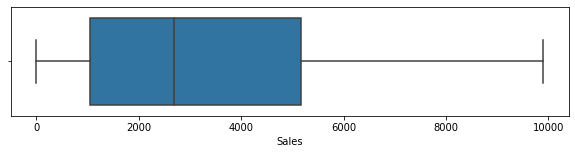

In [ ]:
#Check outliers
plt.figure(figsize=(10,2))
sns.boxplot(df['Sales'])
plt.show()

# **EXPLORATORY DATA ANALYSIS**
---------------------------------------------
### **WHAT IS THE OVERALL SALES TREND?**

In [ ]:
df['Category'].unique()

array(['Food Service', 'Pet Supplies', 'Clothing', 'Clothing Accessories',
       'Diapering', 'Cameras', 'Optics', 'Jewellery & Watches',
       'Work Safety Protective Equipment', 'Nursing & Feeding', 'Signage',
       'Advertising & Marketing', 'Dentistry', 'Party & Celebration',
       'Camera & Optic Accessories', 'Baby Bathing',
       'Piercing & Tattooing', 'Baby Toys & Activity Equipment',
       'Baby Transport Accessories', 'Science & Laboratory', 'Medical',
       'Baby Transport', 'Material Handling', 'Baby Health',
       'Hobbies & Creative Arts', 'Baby Safety',
       'Handbag & Wallet Accessories', 'Handbags, Wallets & Cases',
       'Retail', 'Potty Training', 'Photography',
       'Automation Control Components', 'Swaddling & Receiving Blankets',
       'Industrial Storage', 'Costumes & Accessories'], dtype=object)

In [ ]:
df['Sub Category'].unique()


---------------------------------------------
### **CHECK DEPENDENCY BETWEEN CATEGORIES & SUBCATEGORIES**

In [ ]:
# Correlation comparison of different sub-categories
# Process is iterated over various subcategories
# Not Considering:	-0.35 <=Correlation <= 0.35
df_tem=df.loc[df['Sub Category'] == 'Baby & Pet Gate Accessories',:]
df_t=df.loc[df['Sub Category'] == 'Baby-Mobile Accessories',:]
df1 = df_t[['Order Date','Sales']]
df1.rename(columns = {'Sales':'Sales1'}, inplace = True)
df2=df_tem[['Order Date','Sales']]
df2.rename(columns = {'Sales':'Sales2'}, inplace = True)
subcat = df1.append(df2)
subcat['Date'] = subcat['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
subcat=subcat.groupby('Date').agg({'Sales1':'mean', 'Sales2':'mean'})

# Regression plot for Sales
#plt.figure(figsize=(15, 8))
#sns.regplot(x="Sales1", y="Sales2", data=subcat)
#plt.ylim(0,)
subcat.corr()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Sales1,Sales2
Sales1,1.000000,0.556016
Sales2,0.556016,1.000000


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


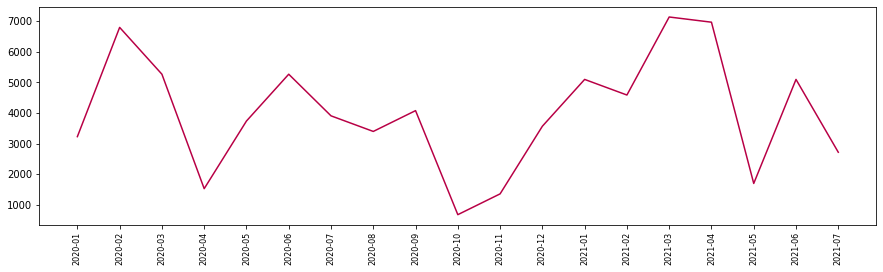

In [ ]:
#SALES TREND ANALYSIS
# Getting month year from order_date
df_tem=df.loc[df['Sub Category'] == 'Video Cameras',:]
df_tem['month_year'] = df_tem['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

# grouping month_year by sales
df_temp = df_tem.groupby('month_year').sum()['Sales'].reset_index()
df_temp = df_temp[df_temp['Sales'] < np.nanpercentile(df_temp['Sales'], 99.999)]
#df_temp=df_temp[(df_temp['Sales'] < 300000)]

# Setting the figure size
plt.figure(figsize=(15, 4))
#plt.fill_between(df_temp.index, df_temp['month_year'], df_temp['Sales'], interpolate=True, color='pink', alpha=0.5)
plt.plot(df_temp['month_year'], df_temp['Sales'], color='#b80045')
#df_temp.plot('month_year' , 'Sales')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [ ]:
df_tem

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


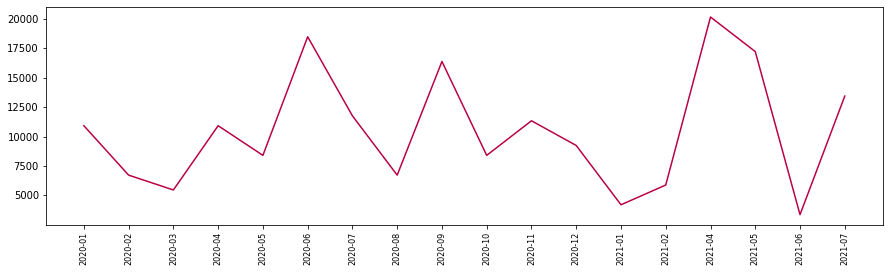

In [ ]:
#SALES TREND ANALYSIS
# Getting month year from order_date
df_t=df.loc[df['Sub Category'] == 'Digital Cameras',:]
df_t['month_year'] = df_t['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

# grouping month_year by sales
df_temp = df_t.groupby('month_year').sum()['Sales'].reset_index()
df_temp = df_temp[df_temp['Sales'] < np.nanpercentile(df_temp['Sales'], 99.9)]
#df_temp=df_temp[(df_temp['Sales'] < 999999)]

# Setting the figure size
plt.figure(figsize=(15, 4))
#plt.fill_between(df_temp.index, df_temp['month_year'], df_temp['Sales'], interpolate=True, color='pink', alpha=0.5)
plt.plot(df_temp['month_year'], df_temp['Sales'], color='#b80045')
#df_temp.plot('month_year' , 'Sales')
plt.xticks(rotation='vertical', size=8)
plt.show()

In [ ]:
#Category--------------------------------------------------------------------------------
df_tem=df.loc[df['Category'] == 'Borescopes',:]
df_t=df.loc[df['Category'] == 'Video Cameras',:]
df1 = df_t[['Order Date','Sales']]
df1.rename(columns = {'Sales':'Sales1'}, inplace = True)
df2=df_tem[['Order Date','Sales']]
df2.rename(columns = {'Sales':'Sales2'}, inplace = True)
subcat = df1.append(df2)
subcat['Date'] = subcat['Order Date'].apply(lambda x: x.strftime('%Y-%m'))
subcat=subcat.groupby('Date').agg({'Sales1':'mean', 'Sales2':'mean'})

# Regression plot for Sales
#plt.figure(figsize=(15, 8))
#sns.regplot(x="Sales1", y="Sales2", data=subcat)
#plt.ylim(0,)
subcat.corr()

In [ ]:
#Category correlation comparison--------------------------------------------------------------------------------
# Getting month year from order_date
df_tem=df.loc[df.Category == 'Pocket Squares',:]
df_tem['month_year'] = df_tem['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

# grouping month_year by sales
df_temp = df_tem.groupby('month_year').sum()['Sales'].reset_index()
df_temp = df_temp[df_temp['Sales'] < np.nanpercentile(df_temp['Sales'], 99.999)]
#df_temp=df_temp[(df_temp['Sales'] < 300000)]

# Setting the figure size
plt.figure(figsize=(15, 4))
#plt.fill_between(df_temp.index, df_temp['month_year'], df_temp['Sales'], interpolate=True, color='pink', alpha=0.5)
plt.plot(df_temp['month_year'], df_temp['Sales'], color='#b80045')
#df_temp.plot('month_year' , 'Sales')
plt.xticks(rotation='vertical', size=8)
plt.show()

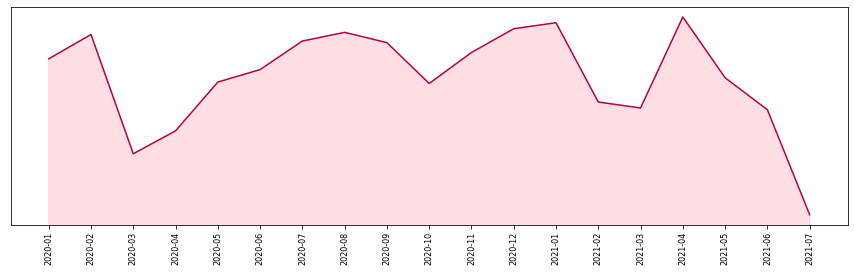

In [ ]:
#OVERALL SALES TREND ANALYSIS
# Getting month year from order_date
df['month_year'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m'))

# grouping month_year by sales
df_temp = df.groupby('month_year').sum()['Sales'].reset_index()

df_temp=df_temp[(df_temp['Sales'] < 10000000)]

# Setting the figure size
plt.figure(figsize=(15, 4))
plt.fill_between(df_temp.index-1, df_temp['month_year'], df_temp['Sales'], interpolate=True, color='pink', alpha=0.5)
plt.plot(df_temp['month_year'], df_temp['Sales'], color='#b80045')
#df_temp.plot('month_year' , 'Sales' )
plt.xticks(rotation='vertical', size=8)
plt.show()

In [ ]:
df_temp.describe()

,Sales
count,1.900000e+01
mean,2.884809e+06
std,2.112043e+05
min,2.313220e+06
25%,2.768400e+06
50%,2.915310e+06
75%,3.047495e+06
max,3.133690e+06


In [ ]:
print(df_temp)

   month_year    Sales
1     2020-01  2960090
2     2020-02  3061020
3     2020-03  2565930
4     2020-04  2661210
5     2020-05  2863570
6     2020-06  2915310
7     2020-07  3033970
8     2020-08  3070010
9     2020-09  3027190
10    2020-10  2857840
11    2020-11  2986310
12    2020-12  3085070
13    2021-01  3109830
14    2021-02  2780750
15    2021-03  2756050
16    2021-04  3133690
17    2021-05  2881480
18    2021-06  2748840
19    2021-07  2313220


## **Which date had maximum sales?**

In [ ]:
# Getting month year from order_date
df['Date'] = df['Order Date'].apply(lambda x: x.strftime('%Y-%m-%d'))

# grouping month_year by sales
df_temp = df.groupby('Date').sum()['Sales'].reset_index()
df_temp.sort_values(by=['Sales'], inplace=True, ascending=False)
df_temp=df_temp[(df_temp['Sales'] < 10000000)]
df_temp.head(10)

,Date,Sales
320,2020-11-15,193020
256,2020-09-12,184510
430,2021-03-05,181980
393,2021-01-27,177140
159,2020-06-07,176900
263,2020-09-19,174930
550,2021-07-03,174930
344,2020-12-09,174500
416,2021-02-19,174400
230,2020-08-17,172460


### **WHAT ARE THE MOST SELLING SUB-CATEGORIES?**

In [ ]:
# Grouping products by Quantity
best_selling_prods = pd.DataFrame(df.groupby('Sub Category').sum()['Quantity'])

# Sorting the dataframe in descending order
best_selling_prods.sort_values(by=['Quantity'], inplace=True, ascending=False)

# Most selling products
best_selling_prods[:15]

,Quantity
Sub Category,
Pocket Squares,4205
Baby & Pet Gate Accessories,4089
Gloves & Mittens,4054
Baby Bathtubs & Bath Seats,4018
Camera Lens Accessories,3993
Baby Safety Harnesses & Reins,3938
Borescopes,3934
Earmuffs,3897
Disposable Serving Accessories,3886


### **WHICH ARE THE MOST SELLING CATEGORY AND SUB-CATEGORY?**

In [ ]:
# Grouping products by Category and Sub-Category
cat_subcat = pd.DataFrame(df.groupby(['Category', 'Sub Category']).sum()['Sales'])

# Sorting the values
cat_subcat.sort_values(['Category','Sales'], ascending=False)

Sales
Category                         Sub Category                                        
Work Safety Protective Equipment Bullet Proof Vests                            339020
                                 Safety Knee Pads                              332640
                                 Welding Helmets                               264600
                                 Protective Mask Accessories                   254930
                                 Protective Masks                              230560
...                                                                               ...
Automation Control Components    Programmable Logic Controllers                401760
                                 Variable Frequency & Adjustable Speed Drives   95040
Advertising & Marketing          Brochures                                     344560
                                 Trade Show Displays                           293620
                                 Trade Show Counters                           267240

[297 rows x 1 columns]

### **CHECKING IF SALES PREDICTION IS POSSIBLE:**

,Sales,Inventory
Sales,1.000000,-0.137645
Inventory,-0.137645,1.000000


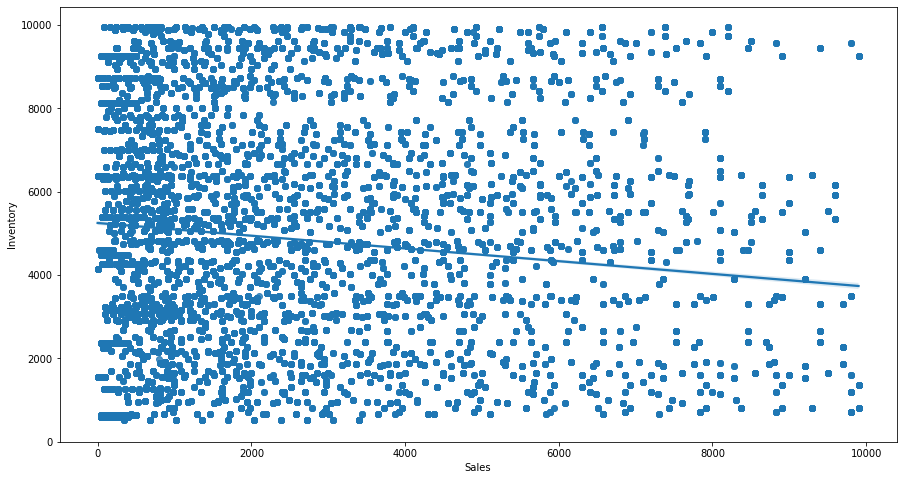

In [ ]:
# Grouping Sub-Category
subcat = df[['Sub Category','Sales','Inventory']]
subcat=subcat.groupby('Sub Category').agg({'Sales':'sum', 'Inventory':'mean'})

# Regression plot for Sales vs Inventory
plt.figure(figsize=(15, 8))
sns.regplot(x="Sales", y="Inventory", data=df)
plt.ylim(0,)
subcat.corr()
from scipy import stats
subcat.corr()
#pearson_coef, p_value = stats.pearsonr(df['Inventory'], df['Sales'])
#print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

### **NO DEPENDENCY EXIST BETWEEN INVENTORY AND TOTAL SALES. HENCE, PREDICTION IS NOT POSSIBLE.**